# Record your mic and create a .wav

In [1]:
import pyaudio
from IPython.display import Audio
import wave
import parselmouth as pm
import matplotlib.pyplot as plt
import numpy as np

CHUNK = 1024 * 2
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 10
WAVE_OUTPUT_FILENAME = "file.wav"


p = pyaudio.PyAudio()

In [3]:
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")
stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


In [6]:
sound = pm.Sound("file.wav")
Audio(data=sound.values, rate=sound.sampling_frequency)

In [30]:
sound = pm.Sound('..\sounds\locucion1.wav')
Audio(data=sound.values, rate=sound.sampling_frequency)

# Wave forms plots

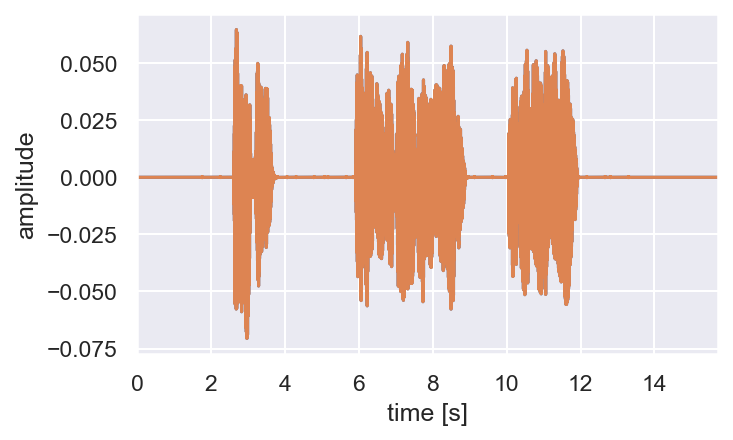

In [31]:
plt.figure(figsize=(5, 3))
plt.plot(sound.xs(), sound.values.T)
plt.xlim([sound.xmin, sound.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()

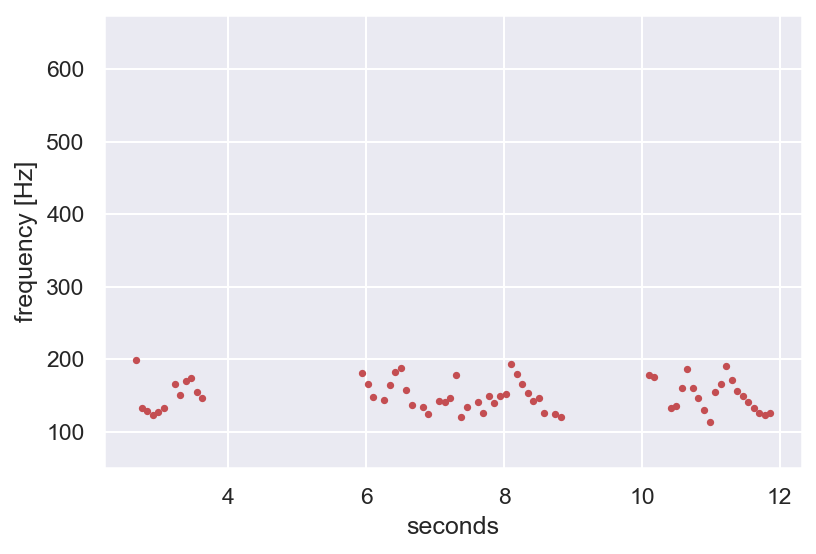

In [32]:
pitch = sound.to_pitch(0.08)
import seaborn as sns
def plotOnGraph(pitch, color):
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2.5, color=color)
def setupGraph(ymin, ymax):
    sns.set()
    plt.rcParams['figure.dpi'] = 150 
    plt.figure()
    plt.ylim(ymin, ymax)
    plt.ylabel("frequency [Hz]")
    plt.xlabel("seconds")
    plt.grid(True)
    #for e in silencios:
        #plt.axvline(x=e, linewidth=1, color='b')
    
setupGraph(50, 675)
             
plotOnGraph(pitch, 'r')
plt.show()

In [19]:
pitch.selected_array['frequency']

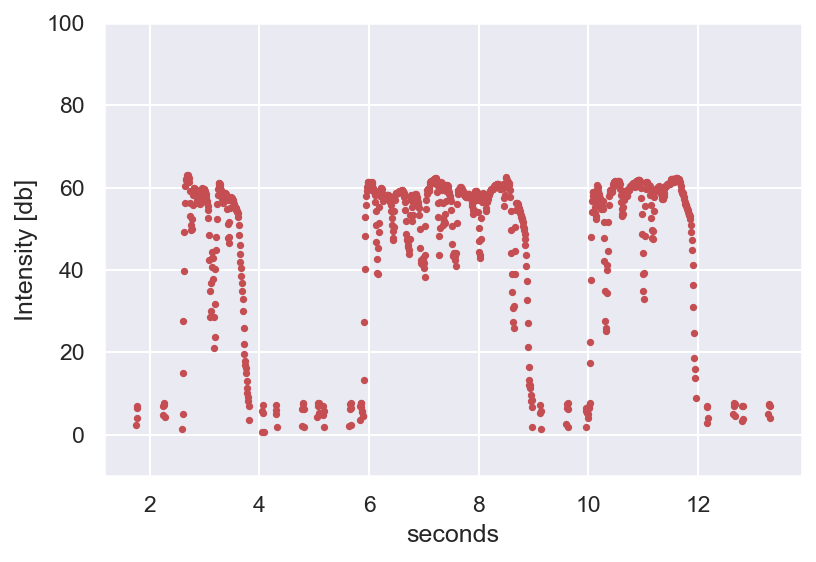

In [33]:
int_grid= sound.to_intensity().t_grid()
int_values = sound.to_intensity().values
int_time = dict(zip(int_grid,int_values[0]))
eliminados = []
import seaborn as sns
def plotint(sound, color):
    for clave in int_time:
        if int_time[clave] <= 0:
            eliminados.append(clave)
            
    for elemento in eliminados:
        int_time.pop(elemento)
    plt.plot(int_time.keys(), int_time.values(), 'o', markersize=2.5, color=color)
    
def setupGraph2(ymin, ymax):
    sns.set()
    plt.rcParams['figure.dpi'] = 150 
    plt.figure()
    plt.ylim(ymin, ymax)
    plt.ylabel("Intensity [db]")
    plt.xlabel("seconds")
    plt.grid(True)

    
setupGraph2(-10, 100)
             
plotint(sound, 'r')
plt.show()

# Convertir a texto

In [35]:
import speech_recognition as sr
r = sr.Recognizer()

sample= sr.AudioFile('..\sounds\locucion1.wav')
#sample= sr.AudioFile('file.wav')

with sample as source:
    audio = r.record(source)
try:
    s = r.recognize_google(audio, language= 'es-ES')
    print(s)
except Exception as e:
    print("Exception: "+str(e))

toda la actualidad en el canal de información internacional líder en Europa disponible en todo el mundo


# Analisis

In [36]:
int_time

{1.7493333333333336: 2.421886820909683,
 1.7573333333333336: 6.560363627419626,
 1.7653333333333336: 6.906400758622278,
 1.7733333333333337: 4.105106192235368,
 2.237333333333334: 4.741029758330899,
 2.245333333333334: 6.996777837980596,
 2.253333333333334: 7.591721472107408,
 2.261333333333334: 7.254935813506249,
 2.269333333333334: 4.329485217463709,
 2.5893333333333337: 1.3968412563466768,
 2.5973333333333337: 4.98890149338614,
 2.6053333333333337: 15.00491515606371,
 2.6133333333333337: 27.587374772042374,
 2.6213333333333337: 39.83852124136253,
 2.6293333333333337: 49.239514926060515,
 2.6373333333333338: 56.25755107975536,
 2.6453333333333338: 60.354731240907626,
 2.6533333333333338: 61.85315807209636,
 2.6613333333333338: 61.97546905896155,
 2.669333333333334: 62.07247589886517,
 2.677333333333334: 62.588464647741105,
 2.685333333333334: 63.09265033455734,
 2.693333333333334: 63.079097921489016,
 2.701333333333334: 62.672144356865466,
 2.709333333333334: 62.25590146352179,
 2.71

In [37]:
pitch = sound.to_pitch(0.08)

pitch_strength = pitch.selected_array['strength']
pitch_frequencys = pitch.selected_array['frequency']

freq_grid = pitch.t_grid()

freq_time = dict(zip(freq_grid,pitch_frequencys))
freq_time

{-0.018666666666666387: 0.0,
 0.061333333333333614: 0.0,
 0.14133333333333362: 0.0,
 0.22133333333333363: 0.0,
 0.3013333333333336: 0.0,
 0.3813333333333336: 0.0,
 0.4613333333333336: 0.0,
 0.5413333333333337: 0.0,
 0.6213333333333336: 0.0,
 0.7013333333333337: 0.0,
 0.7813333333333337: 0.0,
 0.8613333333333336: 0.0,
 0.9413333333333337: 0.0,
 1.0213333333333336: 0.0,
 1.1013333333333337: 0.0,
 1.1813333333333336: 0.0,
 1.2613333333333336: 0.0,
 1.3413333333333337: 0.0,
 1.4213333333333338: 0.0,
 1.5013333333333336: 0.0,
 1.5813333333333337: 0.0,
 1.6613333333333338: 0.0,
 1.7413333333333336: 0.0,
 1.8213333333333337: 0.0,
 1.9013333333333338: 0.0,
 1.9813333333333336: 0.0,
 2.0613333333333337: 0.0,
 2.1413333333333338: 0.0,
 2.221333333333334: 0.0,
 2.301333333333334: 0.0,
 2.3813333333333335: 0.0,
 2.4613333333333336: 0.0,
 2.5413333333333337: 0.0,
 2.6213333333333337: 198.2055417827316,
 2.701333333333334: 133.2867079031184,
 2.781333333333334: 129.1125271078325,
 2.8613333333333335

In [39]:
from pydub import AudioSegment,silence

myaudio = intro = AudioSegment.from_mp3('..\sounds\locucion1.wav')
dBFS=myaudio.dBFS
silence = silence.detect_silence(myaudio, min_silence_len=1000, silence_thresh=dBFS-16)

silence = [((start/1000),(stop/1000)) for start,stop in silence] #in sec
print(silence)

[(0.0, 2.65), (3.604, 5.952), (8.798, 10.078), (11.851, 15.723)]


# Real time

In [43]:
import os
import struct
from scipy.fftpack import fft
import time
from tkinter import TclError



# stream object to get data from microphone
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    frames_per_buffer=CHUNK
)


print('stream started')

# for measuring frame rate
frame_count = 0
start_time = time.time()

while True:
    
    # binary data
    data = stream.read(CHUNK)  
    
    # convert data to integers, make np array, then offset it by 127
    data_int = struct.unpack(str(2 * CHUNK) + 'B', data)
    
    # create np array and offset by 128
    data_np = np.array(data_int, dtype='b')[::2] + 128
    
    
    # compute FFT and update line
    yf = fft(data_int)
    line_fft.set_ydata(np.abs(yf[0:CHUNK])  / (128 * CHUNK))
    
    print(line_fft)

OSError: [Errno -9996] Invalid input device (no default output device)

# Final Script

In [ ]:
import logging
import sys
import numpy as np
import parselmouth  # https://parselmouth.readthedocs.io/en/stable/
import os
import pandas as pd
#from syllabe_nuclei import speech_rate
from jinja2 import Environment, FileSystemLoader
from flask import Flask, render_template, request
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns

app = Flask(__name__)


def draw_intensity(intensity):
    sns.set()
    plt.rcParams['figure.dpi'] = 150
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(True)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

def plotOnGraph(pitch, color):
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2.5, color=color)
    
def setupGraph(ymin, ymax):
    sns.set() # Use seaborn's default style to make attractive graphs
    plt.rcParams['figure.dpi'] = 150 # Show images nicely
    plt.figure()
    plt.ylim(ymin, ymax)
    plt.ylabel("frequency [Hz]")
    plt.xlabel("seconds")
    plt.grid(True)


@app.after_request
def add_header(r):
    """
    Add headers to both force latest IE rendering engine or Chrome Frame,
    and also to cache the rendered page for 10 minutes.
    """
    r.headers["Cache-Control"] = "no-cache, no-store, must-revalidate"
    r.headers["Pragma"] = "no-cache"
    r.headers["Expires"] = "0"
    r.headers['Cache-Control'] = 'public, max-age=0'
    return r

@app.route("/report")
def report():
    #file = request.args.get('file')
    #file = file + ".wav"
    #file = "pulp-fiction.wav"
    snd = parselmouth.Sound('file.wav')
    csv = speech_rate(snd)
    csv = pd.DataFrame(csv.items())
    csv = csv.iloc[1:]

    intensity = snd.to_intensity()
    plt.figure()
    draw_intensity(intensity)
    plt.xlim([snd.xmin, snd.xmax])
    plt.savefig("static/intensity.png")

    pitch = snd.to_pitch()
    setupGraph(0, pitch.ceiling)
    plotOnGraph(pitch, 'r')
    plt.savefig("static/pitch.png")

    env = Environment(loader=FileSystemLoader('.'))
    template = env.get_template("report.html")

    template_vars = {"file": file, "transcripcion": "transcripcion entera del audio", "pausas" : csv.iloc[:3].to_html(), "mensaje": "Muchas pausas corrige x",
                    "intensidad": "intensity.png", "velocimetro": csv.iloc[3:].to_html(), "pitch": "pitch.png"}

    html_out = template.render(template_vars)
    return html_out


logging.basicConfig()



if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [26/Mar/2021 18:43:34] "GET / HTTP/1.1" 404 -
ERROR:__main__:Exception on /report [GET]
Traceback (most recent call last):
  File "C:\Users\mikfe\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\mikfe\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\mikfe\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\mikfe\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\mikfe\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\mikfe\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_fun